In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from eofs.xarray import Eof
from dust import map_terrain_china
from dust.plot.plotting import mpl_base_map_plot_xr, plot_log_anomaly
import cartopy.crs as ccrs
import numpy as np
from thesis_toolbox.utils import get_locations_CLP,read_depostion_datasets
import matplotlib as mpl
from scipy import signal
from thesis_toolbox.plot.tools import add_letter,map_large_scale
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
%matplotlib inline

## EOF analysis emissions


In [4]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    oro=snakemake.input.oro
else:
    path = '../../'
    to_file= False
    oro = '../../downloads/ERA5_orography.nc'

In [5]:
ems_dset = xr.open_dataset(path+'results/model_results/intermediate_results/emission_flux.china.MAM.1999-2019.nc')

In [6]:
ems_dset_y = ems_dset.resample(time='Y').sum()
ems_dset_y = ems_dset_y.assign(Emissions_detrended = (['time','lat','lon'],signal.detrend(ems_dset_y.Emission,axis=0)))

In [7]:
coslat = np.cos(np.deg2rad(ems_dset_y['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
pca_ems_detrended = Eof(ems_dset_y.Emissions_detrended,weights=wgts)
eofs_detrend = pca_ems_detrended.eofsAsCovariance(neofs=3)

pcs = pca_ems_detrended.pcs(1,3)

#### What kind of circulation does the two EOF represent

In [ ]:

# var_frac = pca_ems_detrended.varianceFraction(neigs=3)
# fig = plt.figure(figsize=(8.3,4))
# gs = fig.add_gridspec(ncols=2,nrows=2, height_ratios=[1,0.6],hspace=0.12, wspace=0.05)

# ax0 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
# map_terrain_china(ax0)
# ax0.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
# plot_log_anomaly(eofs_detrend.sel(mode=[0,1]).sum(dim='mode'), linthresh=0.0001, vmin=-5e-2, vmax=5e-2,upper_bound=1e-4, ax=ax0,
#                                lower_bound=-1e-4, cmap='bwr', add_labels=False, colorbar=False)
# ax0.text(0.15,0.11, '{:1.2f} %'.format(var_frac.sel(mode=[0,1]).sum().values*100), verticalalignment='center',horizontalalignment='center',
#          transform=ax0.transAxes, fontsize=14, bbox=dict(facecolor='white',ec='white'))
# ax1 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree())
# ax1.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)

# map_terrain_china(ax1)
# ax1.text(0.149,0.11, '{:1.2f} %'.format(var_frac.sel(mode=2).values*100), verticalalignment='center',horizontalalignment='center',
#          transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='white', ec='white'))
# plot_log_anomaly(eofs_detrend.sel(mode=2), linthresh=0.0001, vmin=-5e-2, vmax=5e-2,upper_bound=1e-4, ax=ax1,
#                                lower_bound=-1e-4, cmap='bwr', add_labels=False, colorbar=False)
# ax2 = fig.add_subplot(gs[1,:])
# ax2.plot(pcs.time.dt.year,pcs.sel(mode=[0,1]).sum(dim='mode'), label='EOF1+EOF2')
# ax2.plot(pcs.time.dt.year,pcs.sel(mode=2), label='EOF3')
# ax2.set_ylim(-2,2)
# ax2.set_xticks(pcs.time.dt.year[::4])
# #ax2.legend(ncol=2)
# cax = fig.add_axes([0.97,0.125,0.03,0.7])
# norm=mpl.colors.SymLogNorm(linthresh=0.0001, linscale=1,vmin=-5e-2, vmax=5e-2,base=10)
# fig.colorbar(cm.ScalarMappable(norm=norm,cmap='bwr'), cax=cax)
# add_letter(np.array((ax0,ax1,ax2)),y=0.85)
# l,h = ax2.get_legend_handles_labels()
# ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
# ax2.axhline(y=0, color='lightcoral', linestyle='-', zorder=-10)
# fig.legend(l,h,bbox_to_anchor=(0.25,0.02),loc='center', ncol=2, frameon=False)
# # if to_file:
# #     plt.savefig(snakemake.output.outpath, bbox_inches='tight')

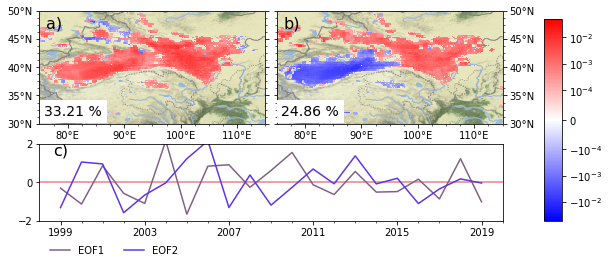

In [41]:

var_frac = pca_ems_detrended.varianceFraction(neigs=3)
fig = plt.figure(figsize=(8.3,4))
gs = fig.add_gridspec(ncols=2,nrows=2, height_ratios=[1,0.6],hspace=0.12, wspace=0.05)

ax0 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
map_terrain_china(ax0)
ax0.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
plot_log_anomaly(eofs_detrend.sel(mode=0), linthresh=0.0001, vmin=-5e-2, vmax=5e-2,upper_bound=1e-4, ax=ax0,
                               lower_bound=-1e-4, cmap='bwr', add_labels=False, colorbar=False)
ax0.text(0.15,0.11, '{:1.2f} %'.format(var_frac.sel(mode=0).values*100), verticalalignment='center',horizontalalignment='center',
         transform=ax0.transAxes, fontsize=14, bbox=dict(facecolor='white',ec='white'))
ax1 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree())
ax1.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)

map_terrain_china(ax1)
ax1.text(0.149,0.11, '{:1.2f} %'.format(var_frac.sel(mode=1).values*100), verticalalignment='center',horizontalalignment='center',
         transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='white', ec='white'))
plot_log_anomaly(eofs_detrend.sel(mode=1), linthresh=0.0001, vmin=-5e-2, vmax=5e-2,upper_bound=1e-4, ax=ax1,
                               lower_bound=-1e-4, cmap='bwr', add_labels=False, colorbar=False)
ax2 = fig.add_subplot(gs[1,:])
ax2.plot(pcs.time.dt.year,pcs.sel(mode=0), label='EOF1')
ax2.plot(pcs.time.dt.year,pcs.sel(mode=1), label='EOF2')
ax2.set_ylim(-2,2)
ax2.set_xticks(pcs.time.dt.year[::4])
#ax2.legend(ncol=2)
cax = fig.add_axes([0.97,0.125,0.03,0.7])
norm=mpl.colors.SymLogNorm(linthresh=0.0001, linscale=1,vmin=-5e-2, vmax=5e-2,base=10)
fig.colorbar(cm.ScalarMappable(norm=norm,cmap='bwr'), cax=cax)
add_letter(np.array((ax0,ax1,ax2)),y=0.85)
l,h = ax2.get_legend_handles_labels()
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.axhline(y=0, color='lightcoral', linestyle='-', zorder=-10)
fig.legend(l,h,bbox_to_anchor=(0.25,0.02),loc='center', ncol=2, frameon=False)
if to_file:
    plt.savefig(snakemake.output.outpath, bbox_inches='tight')


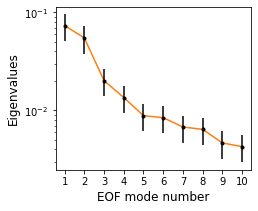

In [16]:
fig,ax = plt.subplots(figsize=(3.5,3))
eigs = pca_ems_detrended.eigenvalues(neigs=10)
errors = pca_ems_detrended.northTest(neigs=10,vfscaled=False)
ax.plot(eigs.mode+1,eigs,color='tab:orange')
ax.errorbar(eigs.mode+1,eigs,yerr=errors.values, fmt='.k', zorder=1000)
ax.set_xticks(eigs.mode+1)
ax.set_xlabel("EOF mode number")
ax.set_ylabel("Eigenvalues")
ax.semilogy()
if to_file:
    plt.savefig(snakemake.output.elow_plot, dpi=300,bbox_inches='tight')

#### Which mode of the PCs correspond to what kind of emission pattern

In [8]:
from thesis_toolbox.composites.create_composites import select_years_to_composite, create_composite
from thesis_toolbox.composites.setup_thesis_data import mslp_wind_composite
from thesis_toolbox.plot.plot_composites import plot_mslp_850hpa_composite

In [9]:
weak_years_pc1, strong_years_pc1 = select_years_to_composite(pcs.sel(mode=0),4)
weak_years_pc2, strong_years_pc2 = select_years_to_composite(pcs.sel(mode=1),4)

In [31]:
ems_dset_y = ems_dset_y.assign(time=ems_dset_y.time.dt.year)

In [32]:
ems_positive_pc = ems_dset_y.sel(time=strong_years_pc2)
ems_positive_pc = ems_positive_pc.Emission.mean(dim='time',keep_attrs=True)
ems_positive_pc = ems_positive_pc/ems_positive_pc.mean(dim=['lon','lat'])

In [33]:
ems_negative_pc = ems_dset_y.sel(time=weak_years_pc2)
ems_negative_pc = ems_negative_pc.Emission.mean(dim='time')
ems_negative_pc = ems_negative_pc/ems_negative_pc.mean(dim=['lon','lat'])

Text(0.5, 1.0, 'Negative PC2')

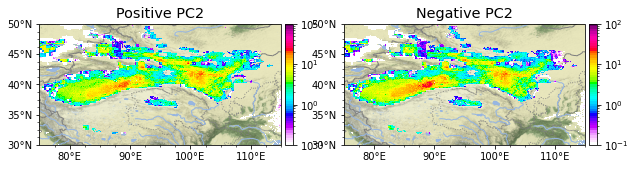

In [42]:
fig,ax = plt.subplots(ncols=2, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,6))
map_terrain_china(ax[0])
mpl_base_map_plot_xr(ems_positive_pc,ax=ax[0], add_labels=False, vmax=1e2)
ax[0].set_title('Positive PC2')
map_terrain_china(ax[1])
mpl_base_map_plot_xr(ems_negative_pc,ax=ax[1], add_labels=False, vmax=1e2)
ax[1].set_title('Negative PC2')

In [46]:
ems_pc_anomal= ems_positive_pc-ems_negative_pc

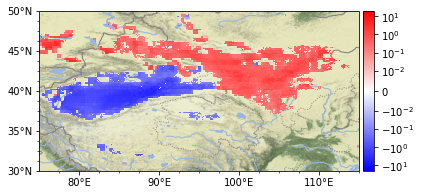

In [47]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
map_terrain_china(ax)
plot_log_anomaly(ems_pc_anomal,linthresh=0.01, vmin=-2e1, vmax=2e1,upper_bound=1e-1, ax=ax,
                               lower_bound=-1e-1, cmap='bwr', add_labels=False)

The negative EOF mode correspond to heigher emissions from mongolia relative to taklamakan and vise versa for postive EOF. 

## Circulation composite of positive EOF2 - negative EOF2

In [10]:
data_path = path+'downloads/intermediate_results/'
u_850_hpa=xr.open_dataset(data_path+'/era5.850hPa.u_component_of_wind.DJF.1979-2019.nc')
v_850_hpa=xr.open_dataset(data_path+'era5.850hPa.v_component_of_wind.DJF.1979-2019.nc')
mslp = xr.open_dataset(data_path+'era5.single_level.mean_sea_level_pressure.DJF.1979-2019.nc')

In [11]:
eof1_composite = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_years_pc1,strong_years_pc1, '850','DJF')
eof2_composite = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_years_pc2,strong_years_pc2, '850','DJF')

/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


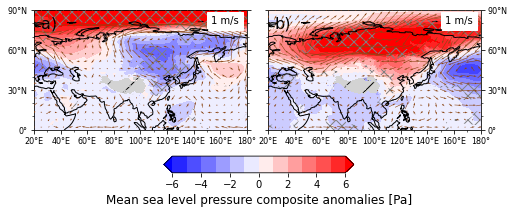

In [12]:
fig,ax = plt.subplots(ncols=2, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8,2.9))
plot_mslp_850hpa_composite(eof1_composite,ax=ax[0], x_qk=0.8, y_qk=.91, vector_scale=0.2,angles='uv', colorbar=False,U=1,
                          oro=oro)
ax[0].set_title('EOF1 strong-weak')
plot_mslp_850hpa_composite(eof2_composite,ax=ax[1], x_qk=0.8, y_qk=.91, vector_scale=0.2,angles='uv', colorbar=False, U=1,
                          oro=oro)
ax[1].set_title('EOF2 strong-weak')
add_letter(ax, y=0.85)
ax[1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True, labelsize=8)
ax[0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False, labelsize=8)
ax[0].tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=8)
ax[1].tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=8)
fig.subplots_adjust(wspace=0.1)
cmap = mpl.cm.bwr

cax = fig.add_axes([0.35,0.01,0.33,0.08])
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.composite_path_djf,bbox_inches='tight')

In [13]:
data_path = path+'downloads/intermediate_results/'
u_850_hpa=xr.open_dataset(data_path+'/era5.850hPa.u_component_of_wind.MAM.1979-2019.nc')
v_850_hpa=xr.open_dataset(data_path+'era5.850hPa.v_component_of_wind.MAM.1979-2019.nc')
mslp = xr.open_dataset(data_path+'era5.single_level.mean_sea_level_pressure.MAM.1979-2019.nc')
eof1_composite = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_years_pc1,strong_years_pc1, '850','MAM')
eof2_composite = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_years_pc2,strong_years_pc2, '850','MAM')

/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ovewh/.local/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


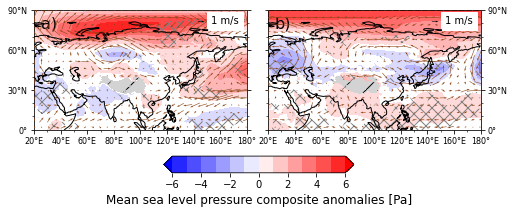

In [15]:
fig,ax = plt.subplots(ncols=2, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8,2.9))
plot_mslp_850hpa_composite(eof1_composite,ax=ax[0], x_qk=0.8, y_qk=.91, vector_scale=0.2,angles='uv', 
                           colorbar=False,U=1,oro=oro)
ax[0].set_title('EOF1 strong-weak')
plot_mslp_850hpa_composite(eof2_composite,ax=ax[1], x_qk=0.8, y_qk=.91, vector_scale=0.2,angles='uv',
                           colorbar=False,U=1, oro=oro)
ax[1].set_title('EOF2 strong-weak')
add_letter(ax, y=0.85)
ax[1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True, labelsize=8)
ax[0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False, labelsize=8)
ax[0].tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=8)
ax[1].tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=8)
fig.subplots_adjust(wspace=0.1)
cmap = mpl.cm.bwr

cax = fig.add_axes([0.35,0.01,0.33,0.08])
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.composite_path_mam,bbox_inches='tight')